# 🎯 Student Performance Prediction

### Aim:
The aim of this project is to predict students’ academic performance using demographic, social, and study-related factors.

- **Regression Task:** Predict the actual exam scores.  
- **Classification Task:** Categorize students into performance levels (High, Medium, Low).  

This project demonstrates both regression and classification approaches in machine learning.


In [55]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
)
# for regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [56]:
#loading dataset
df = pd.read_csv('/content/Students Performance Dataset.csv')
df.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Mathematics           97.36          40.61        59.61  ...   
1     Business           97.71          57.27        74.00  ...   
2  Engineering           99.52          41.84        63.85  ...   
3  Engineering           90.38          45.65        44.44  ...   
4           CS           59.41          53.13        61.77  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           62.84      59.8865      F                  10.3   
1           98.23      81.9170      B                  27.1   
2           91.22      67.7170      D                  12.4   
3           55.48      51.6535      F                  25.5   
4           87.43      71.4030      C                  13.3   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                         Yes                      No                Master's   
1                          No                      No             High School   
2                         Yes                      No             High School   
3                          No                     Yes             High School   
4                         Yes                      No                Master's   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   1                   5.9  
1                 Low                   4                   4.3  
2                 Low                   9                   6.1  
3                 Low                   8                   4.9  
4              Medium                   6                   4.5  

[5 rows x 23 columns]

#Exploring the Dataset

In [57]:
#  Dataset Information
print("Shape of dataset:", df.shape)


Shape of dataset: (5000, 23)


In [58]:
print("\nColumn names:", df.columns.tolist())


Column names: ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']


In [59]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score    

In [60]:
#  Summary statistics
df.describe(include="all")


Student_ID First_Name Last_Name                       Email Gender  \
count        5000       5000      5000                        5000   5000   
unique       5000          8         6                        5000      2   
top         S5999      Maria   Johnson  student4999@university.com   Male   
freq            1        657       868                           1   2551   
mean          NaN        NaN       NaN                         NaN    NaN   
std           NaN        NaN       NaN                         NaN    NaN   
min           NaN        NaN       NaN                         NaN    NaN   
25%           NaN        NaN       NaN                         NaN    NaN   
50%           NaN        NaN       NaN                         NaN    NaN   
75%           NaN        NaN       NaN                         NaN    NaN   
max           NaN        NaN       NaN                         NaN    NaN   

                Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
count   5000.000000         5000     5000.000000    5000.000000  5000.000000   
unique          NaN            4             NaN            NaN          NaN   
top             NaN  Engineering             NaN            NaN          NaN   
freq            NaN         1274             NaN            NaN          NaN   
mean      21.048400          NaN       75.356076      70.701924    69.546552   
std        1.989786          NaN       14.392716      17.436325    17.108996   
min       18.000000          NaN       50.010000      40.000000    40.010000   
25%       19.000000          NaN       62.945000      55.707500    54.697500   
50%       21.000000          NaN       75.670000      70.860000    69.485000   
75%       23.000000          NaN       87.862500      85.760000    83.922500   
max       24.000000          NaN      100.000000      99.990000    99.980000   

        ...  Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
count   ...      5000.00000  5000.000000   5000           5000.000000   
unique  ...             NaN          NaN      5                   NaN   
top     ...             NaN          NaN      C                   NaN   
freq    ...             NaN          NaN   2307                   NaN   
mean    ...        74.78305    71.652097    NaN             17.521140   
std     ...        14.54243     7.230097    NaN              7.193035   
min     ...        50.00000    50.602000    NaN              5.000000   
25%     ...        61.97000    66.533875    NaN             11.500000   
50%     ...        74.54000    71.696250    NaN             17.400000   
75%     ...        87.63000    76.711625    NaN             23.700000   
max     ...       100.00000    95.091500    NaN             30.000000   

        Extracurricular_Activities Internet_Access_at_Home  \
count                         5000                    5000   
unique                           2                       2   
top                            Yes                     Yes   
freq                          2512                    2520   
mean                           NaN                     NaN   
std                            NaN                     NaN   
min                            NaN                     NaN   
25%                            NaN                     NaN   
50%                            NaN                     NaN   
75%                            NaN                     NaN   
max                            NaN                     NaN   

        Parent_Education_Level Family_Income_Level Stress_Level (1-10)  \
count                     3975                5000         5000.000000   
unique                       4                   3                 NaN   
top                 Bachelor's                 Low                 NaN   
freq                      1020                1687                 NaN   
mean                       NaN                 NaN            5.507200   
std                        NaN                 NaN     

In [61]:
#  Check missing values
df.isnull().sum()


Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

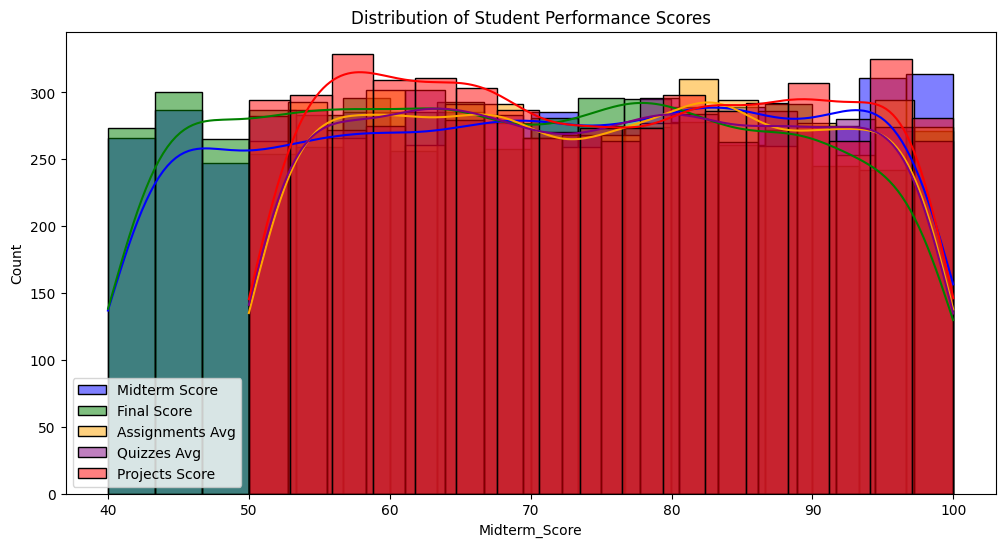

In [62]:
# Step 3.4: Visualize distributions of main performance scores
plt.figure(figsize=(12,6))

sns.histplot(df['Midterm_Score'], kde=True, color='blue', label='Midterm Score')
sns.histplot(df['Final_Score'], kde=True, color='green', label='Final Score')
sns.histplot(df['Assignments_Avg'], kde=True, color='orange', label='Assignments Avg')
sns.histplot(df['Quizzes_Avg'], kde=True, color='purple', label='Quizzes Avg')
sns.histplot(df['Projects_Score'], kde=True, color='red', label='Projects Score')

plt.legend()
plt.title("Distribution of Student Performance Scores")
plt.show()


/tmp/ipython-input-4043144234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Total_Score', data=df, palette='Set2')


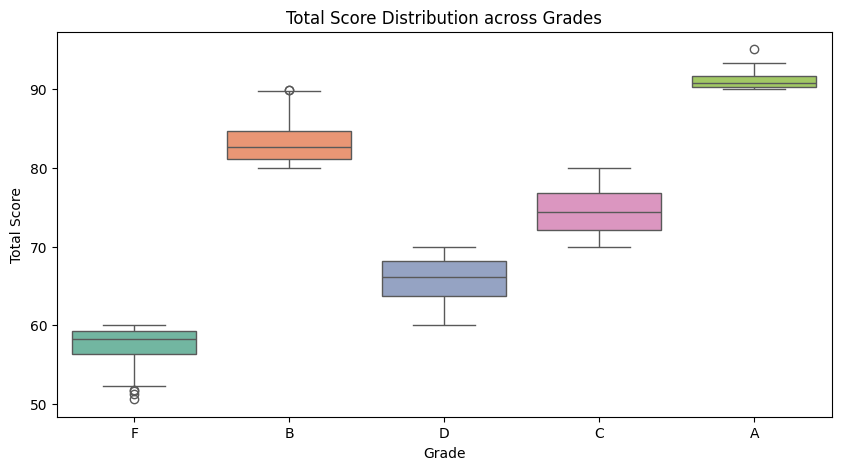

In [63]:
# Step 3.5: Distribution of Total Score with Grade categories
plt.figure(figsize=(10,5))
sns.boxplot(x='Grade', y='Total_Score', data=df, palette='Set2')
plt.title("Total Score Distribution across Grades")
plt.xlabel("Grade")
plt.ylabel("Total Score")
plt.show()


/tmp/ipython-input-2649018384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df, palette='Set3')


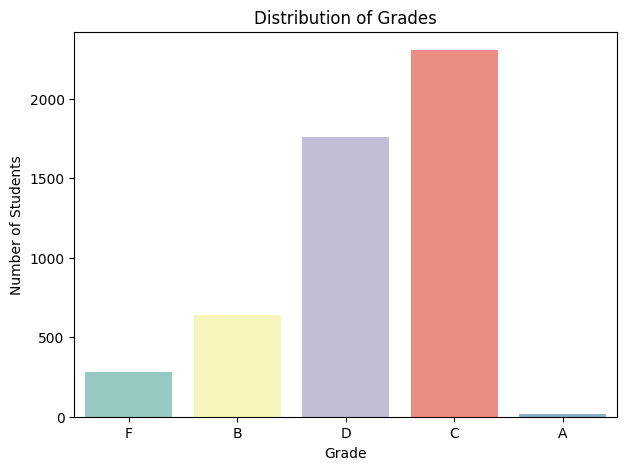

In [64]:
# Step 3.6: Grade distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Grade', data=df, palette='Set3')
plt.title("Distribution of Grades")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()


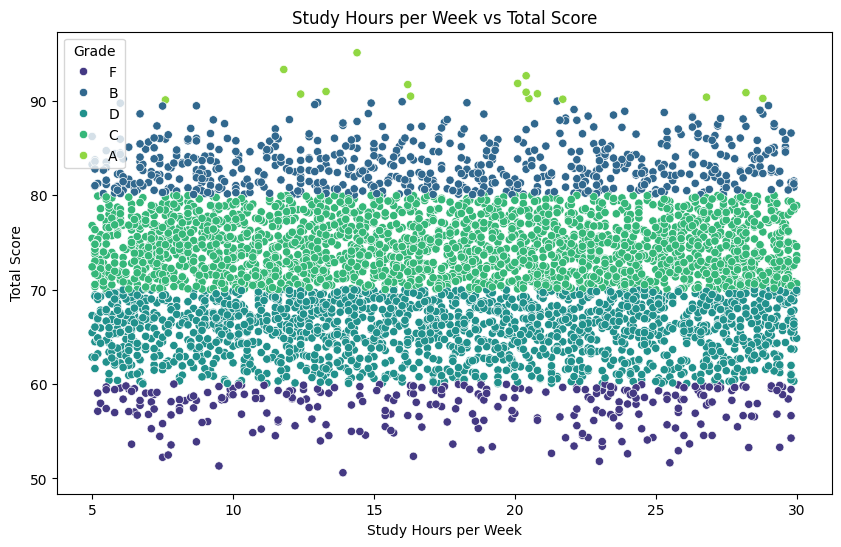

In [65]:
# Step 3.7: Study Hours vs Total Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', hue='Grade', data=df, palette='viridis')
plt.title("Study Hours per Week vs Total Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Total Score")
plt.legend(title="Grade")
plt.show()


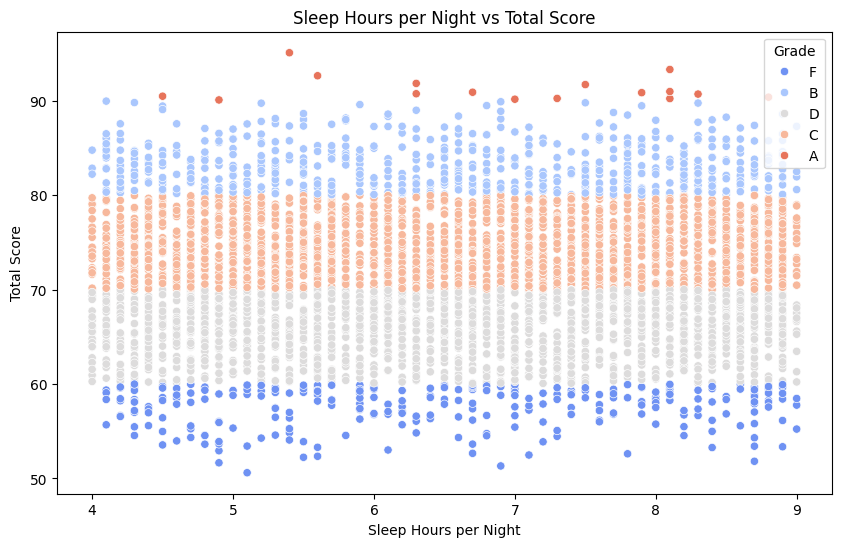

In [66]:
# Step 3.8: Sleep Hours vs Total Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sleep_Hours_per_Night', y='Total_Score', hue='Grade', data=df, palette='coolwarm')
plt.title("Sleep Hours per Night vs Total Score")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Total Score")
plt.legend(title="Grade")
plt.show()


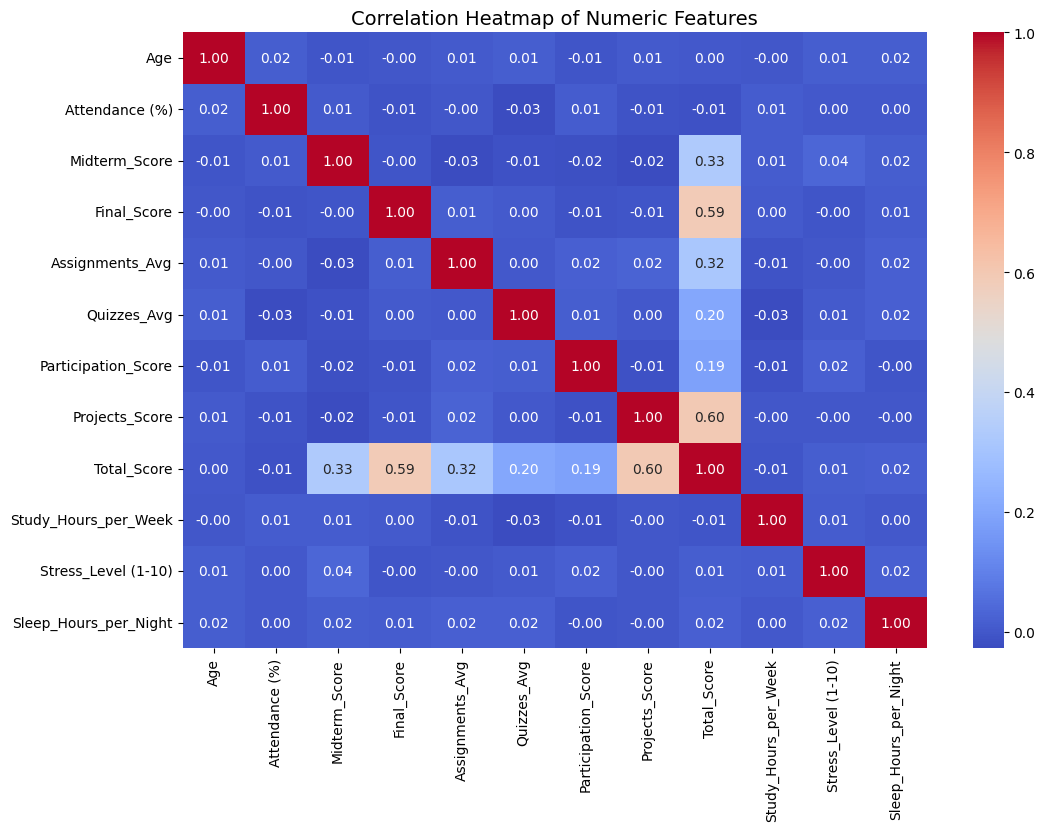

In [67]:
#3.5 Correlation Heatmap (numeric features)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

/tmp/ipython-input-816156503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level (1-10)', y='Total_Score', data=df, palette="Set2")


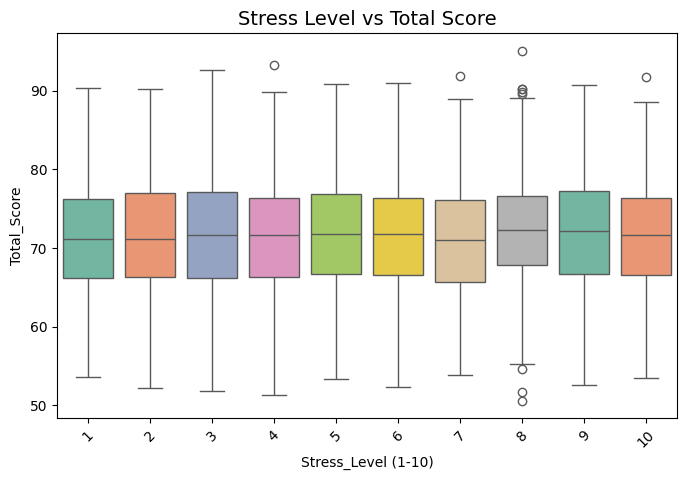

In [68]:
#3.6 Stress Level vs Total Score
plt.figure(figsize=(8,5))
sns.boxplot(x='Stress_Level (1-10)', y='Total_Score', data=df, palette="Set2")
plt.title("Stress Level vs Total Score", fontsize=14)
plt.xticks(rotation=45)
plt.show()

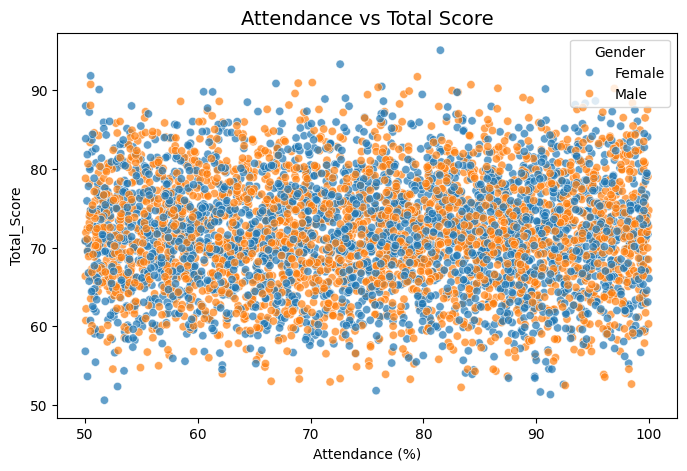

In [69]:
#3.7 Attendance vs Total Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Attendance (%)', y='Total_Score', hue='Gender', data=df, alpha=0.7)
plt.title("Attendance vs Total Score", fontsize=14)
plt.show()

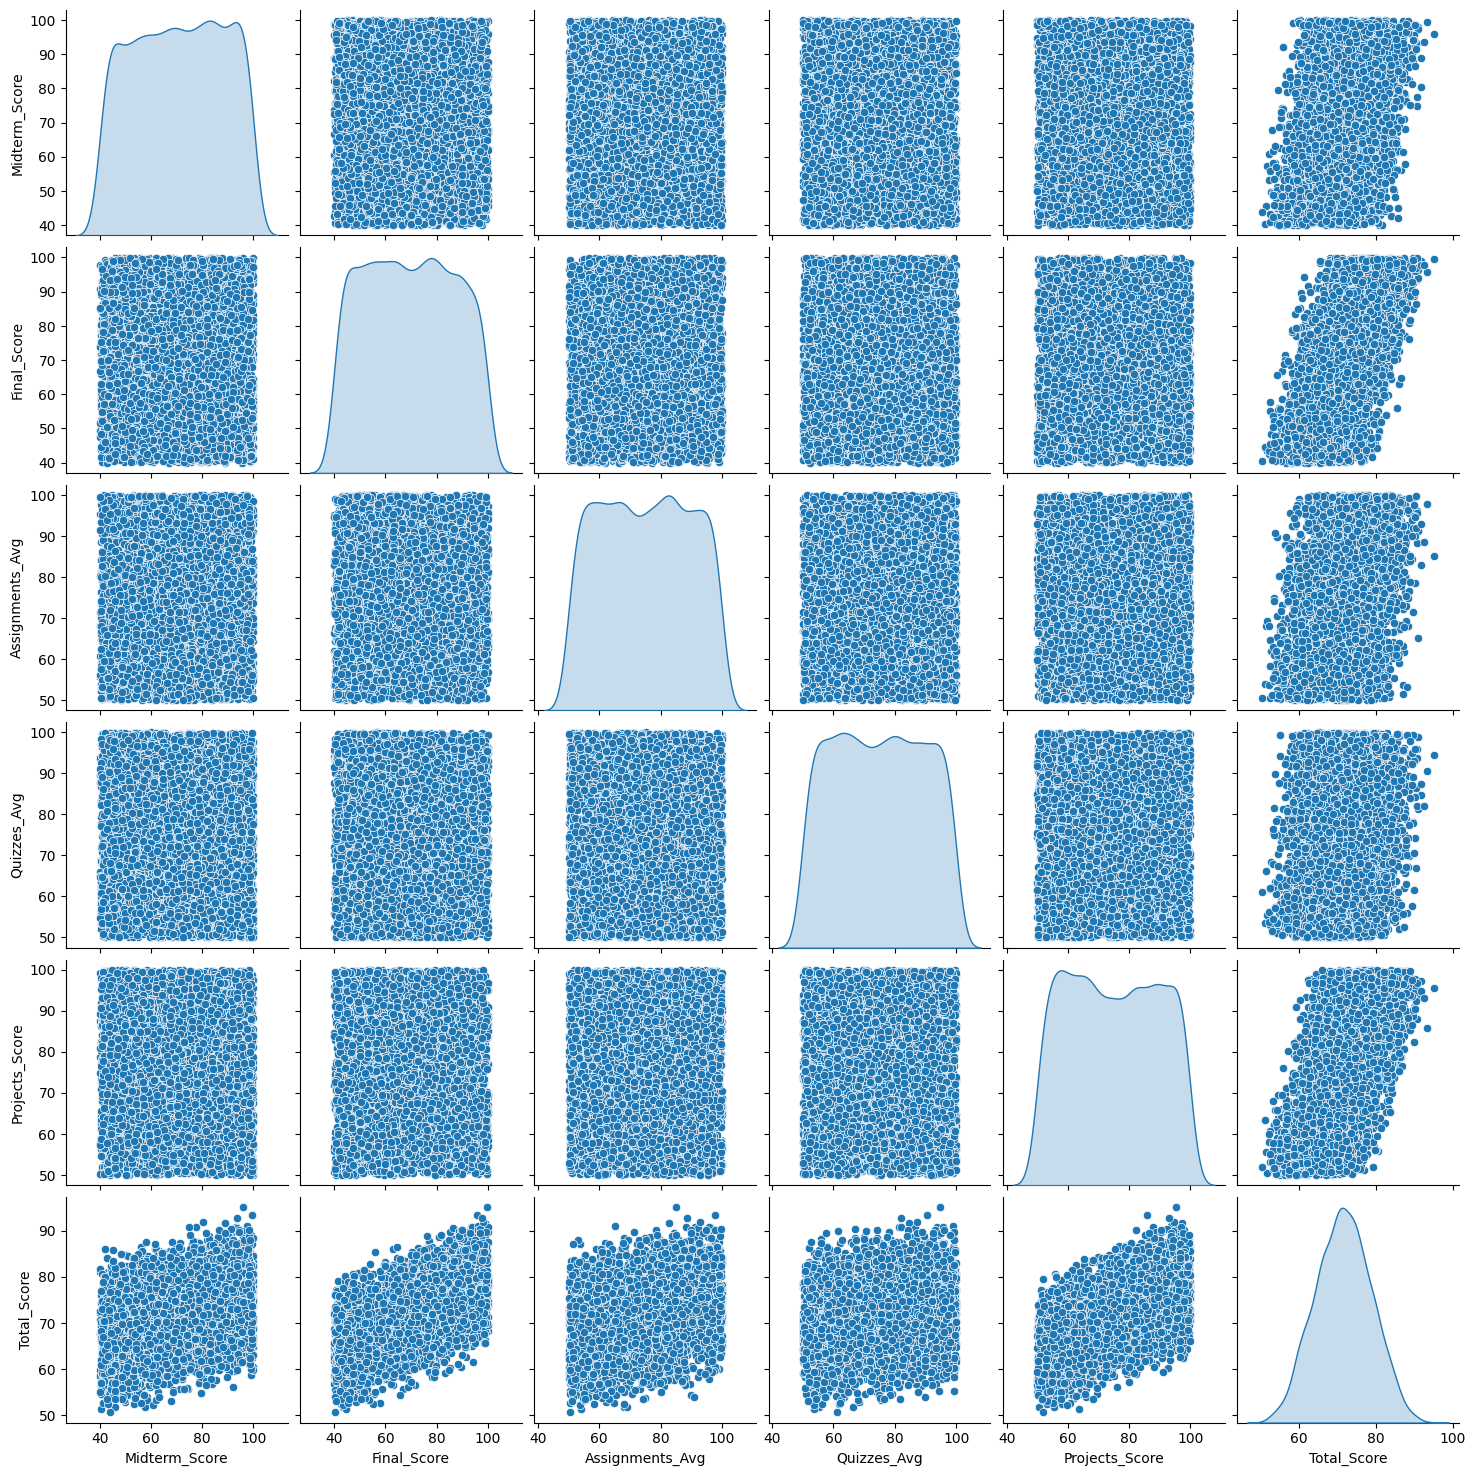

In [70]:
#3.8 Pairplot (optional, for overall patterns)
sns.pairplot(df[['Midterm_Score','Final_Score','Assignments_Avg','Quizzes_Avg','Projects_Score','Total_Score']], diag_kind="kde")
plt.show()

#Feature Engineering & Preprocessing

In [71]:
#Drop unnecessary columns
#We don’t need Student_ID, First_Name, Last_Name, or Email because they don’t contribute to performance.

df_clean = df.drop(columns=['Student_ID','First_Name','Last_Name','Email'])


In [72]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode Grade for classification
label_encoder = LabelEncoder()
df_clean['Grade_encoded'] = label_encoder.fit_transform(df_clean['Grade'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_clean.drop(columns=['Grade']), drop_first=True)

df_encoded.head()


Age  Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0   22           97.36          40.61        59.61            73.69   
1   18           97.71          57.27        74.00            74.23   
2   24           99.52          41.84        63.85            85.85   
3   24           90.38          45.65        44.44            68.10   
4   23           59.41          53.13        61.77            67.66   

   Quizzes_Avg  Participation_Score  Projects_Score  Total_Score  \
0        53.17                 73.4           62.84      59.8865   
1        98.23                 88.0           98.23      81.9170   
2        50.00                  4.7           91.22      67.7170   
3        66.27                  4.2           55.48      51.6535   
4        83.98                 64.3           87.43      71.4030   

   Study_Hours_per_Week  ...  Department_CS  Department_Engineering  \
0                  10.3  ...          False                   False   
1                  27.1  ...          False                   False   
2                  12.4  ...          False                    True   
3                  25.5  ...          False                    True   
4                  13.3  ...           True                   False   

   Department_Mathematics  Extracurricular_Activities_Yes  \
0                    True                            True   
1                   False                           False   
2                   False                            True   
3                   False                           False   
4                   False                            True   

   Internet_Access_at_Home_Yes  Parent_Education_Level_High School  \
0                        False                               False   
1                        False                                True   
2                        False                                True   
3                         True                                True   
4                        False                               False   

   Parent_Education_Level_Master's  Parent_Education_Level_PhD  \
0                             True                       False   
1                            False                       False   
2                            False                       False   
3                            False                       False   
4                             True                       False   

   Family_Income_Level_Low  Family_Income_Level_Medium  
0                    False                        True  
1                     True                       False  
2                     True                       False  
3                     True                       False  
4                    False                        True  

[5 rows x 24 columns]

Define Features (X) and Targets (y). We will prepare data for two tasks:

Regression: Predict Total_Score ---   Classification: Predict Grade

In [73]:
# Regression target
y_reg = df_encoded['Total_Score']
X_reg = df_encoded.drop(columns=['Total_Score','Grade_encoded'])

# Classification target
y_clf = df_encoded['Grade_encoded']
X_clf = df_encoded.drop(columns=['Total_Score','Grade_encoded'])


In [74]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# For regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# For classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [75]:
#Scale numeric features
#Scaling improves ML performance, especially for regression.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

#Model Building – Regression (Predict Total_Score)

In [76]:
#Train Models
#(a) Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

y_pred_lr = lr.predict(X_test_reg)

print("Linear Regression R²:", r2_score(y_test_reg, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)))

Linear Regression R²: 1.0
Linear Regression RMSE: 3.9948681651567875e-14


In [77]:
#(b) Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_reg, y_train_reg)

y_pred_dt = dt.predict(X_test_reg)

print("Decision Tree R²:", r2_score(y_test_reg, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_dt)))

Decision Tree R²: 0.8342590439477484
Decision Tree RMSE: 2.977730142491089


In [78]:
#(c) Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_reg, y_train_reg)

y_pred_rf = rf.predict(X_test_reg)

print("Random Forest R²:", r2_score(y_test_reg, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)))

Random Forest R²: 0.9555378827349323
Random Forest RMSE: 1.542288027302448


In [79]:
#(d) Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_reg, y_train_reg)

y_pred_gb = gb.predict(X_test_reg)

print("Gradient Boosting R²:", r2_score(y_test_reg, y_pred_gb))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_gb)))


Gradient Boosting R²: 0.9867546712724039
Gradient Boosting RMSE: 0.8417861731987674


In [80]:
#Compare Models, We can summarize performance:

results = {
    "Linear Regression": [r2_score(y_test_reg, y_pred_lr), np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))],
    "Decision Tree": [r2_score(y_test_reg, y_pred_dt), np.sqrt(mean_squared_error(y_test_reg, y_pred_dt))],
    "Random Forest": [r2_score(y_test_reg, y_pred_rf), np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))],
    "Gradient Boosting": [r2_score(y_test_reg, y_pred_gb), np.sqrt(mean_squared_error(y_test_reg, y_pred_gb))]
}

results_df = pd.DataFrame(results, index=["R² Score", "RMSE"]).T
print(results_df)

                   R² Score          RMSE
Linear Regression  1.000000  3.994868e-14
Decision Tree      0.834259  2.977730e+00
Random Forest      0.955538  1.542288e+00
Gradient Boosting  0.986755  8.417862e-01


##Visualize Regression Results

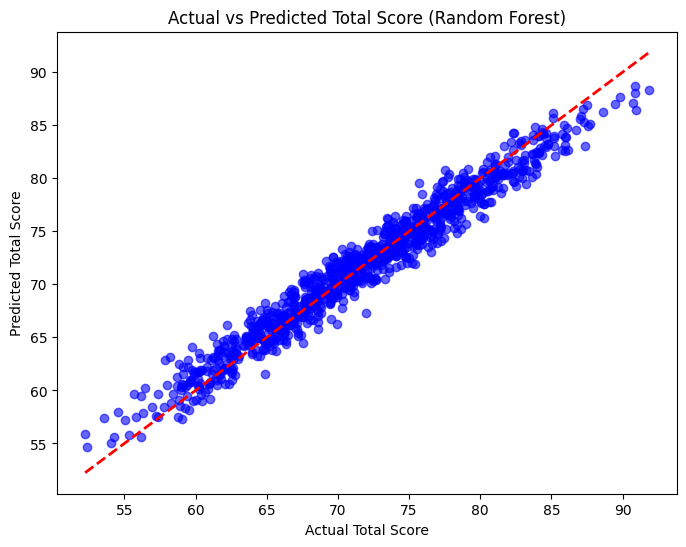

In [81]:
#(a) Plot Actual vs Predicted for Best Model
#(Let’s assume Random Forest performs best – but you can replace with whichever wins)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.6, color="blue")
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         "r--", lw=2)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Total Score (Random Forest)")
plt.show()

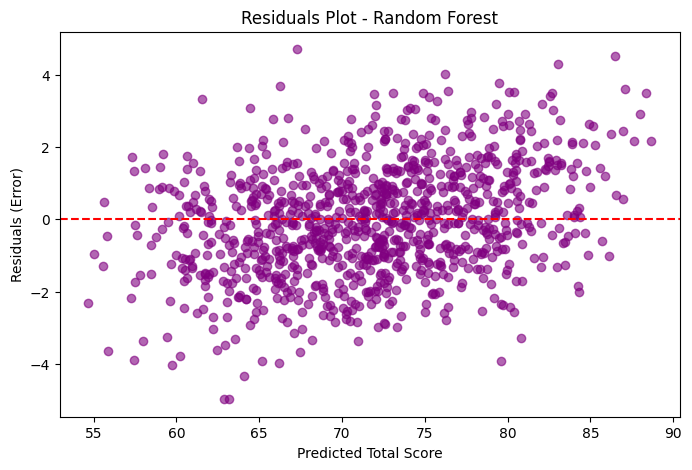

In [82]:
#(b) Residual Plot (Prediction Errors)
residuals = y_test_reg - y_pred_rf

plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Total Score")
plt.ylabel("Residuals (Error)")
plt.title("Residuals Plot - Random Forest")
plt.show()

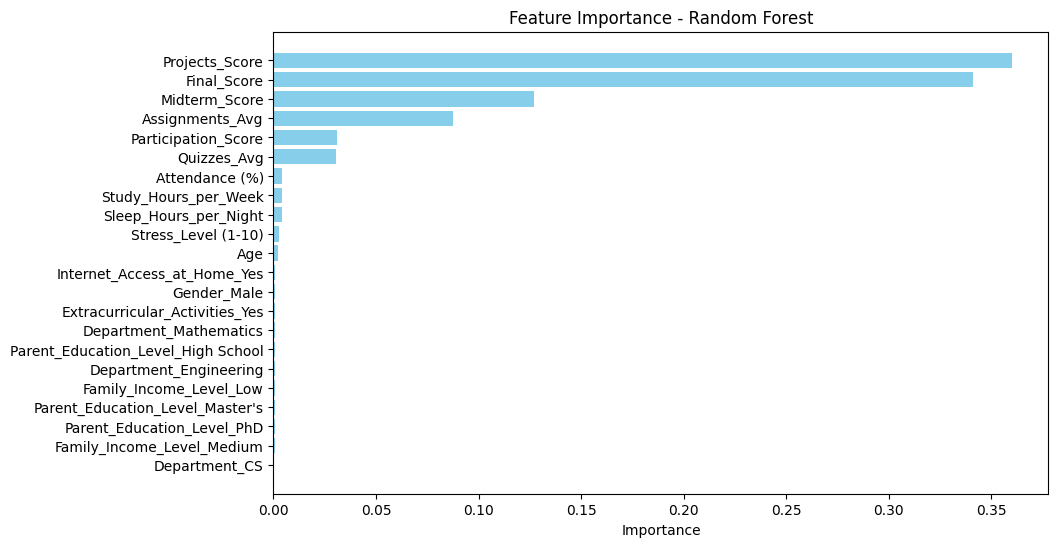

Feature  Importance
7          Projects_Score    0.359798
3             Final_Score    0.340865
2           Midterm_Score    0.127104
4         Assignments_Avg    0.087704
6     Participation_Score    0.030741
5             Quizzes_Avg    0.030629
1          Attendance (%)    0.004135
8    Study_Hours_per_Week    0.004012
10  Sleep_Hours_per_Night    0.003965
9     Stress_Level (1-10)    0.002557

In [83]:
#(c) Feature Importance (Which Factors Affect Scores the Most?)
importances = rf.feature_importances_
features = X_reg.columns

feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importance["Feature"], feat_importance["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

feat_importance.head(10)

#Classification – Predict Student Grades

In [84]:
#(a) Define Target & Features
# Drop non-useful identifiers
X_clf = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Grade', 'Total_Score'])
y_clf = df['Grade']

# Convert categorical variables
X_clf = pd.get_dummies(X_clf, drop_first=True)

print("Features shape:", X_clf.shape)
print("Target classes:", y_clf.unique())



Features shape: (5000, 22)
Target classes: ['F' 'B' 'D' 'C' 'A']


In [85]:
#(b) Train-Test Split
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

In [86]:
#(c) Train Different Classifiers
clf_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Train & evaluate
for name, model in clf_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test_clf, y_pred))
    print("-"*60)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7240
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.62      0.45      0.52       128
           C       0.72      0.82      0.77       461
           D       0.76      0.76      0.76       352
           F       0.70      0.38      0.49        56

    accuracy                           0.72      1000
   macro avg       0.56      0.48      0.51      1000
weighted avg       0.72      0.72      0.72      1000

------------------------------------------------------------
Decision Tree Accuracy: 0.7540
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.72      0.71      0.71       128
           C       0.78      0.80      0.79       461
           D       0.76      0.73      0.75       352
           F       0.61      0.66      0.63        56

    accuracy                           0.75      1000
  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.9380
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.97      0.88      0.92       128
           C       0.94      1.00      0.97       461
           D       0.92      0.96      0.94       352
           F       1.00      0.48      0.65        56

    accuracy                           0.94      1000
   macro avg       0.77      0.66      0.70      1000
weighted avg       0.94      0.94      0.93      1000

------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


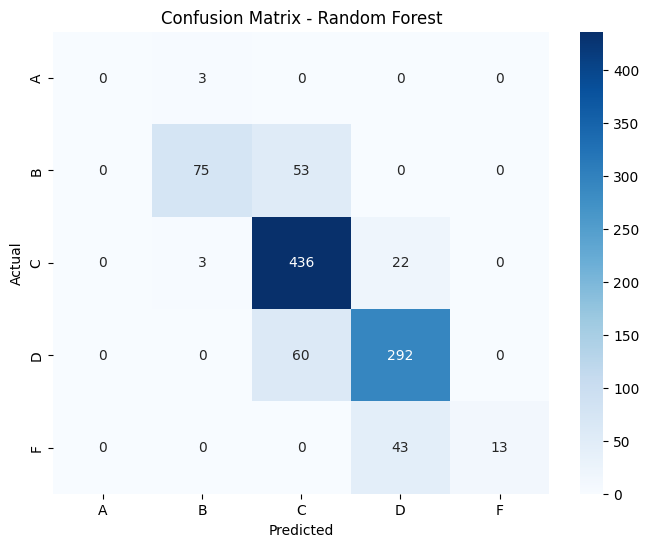

In [87]:
#(d) Confusion Matrix for Best Model...(Example: if Random Forest is best)

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_clf, y_train_clf)
y_pred_best = best_model.predict(X_test_clf)

cm = confusion_matrix(y_test_clf, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

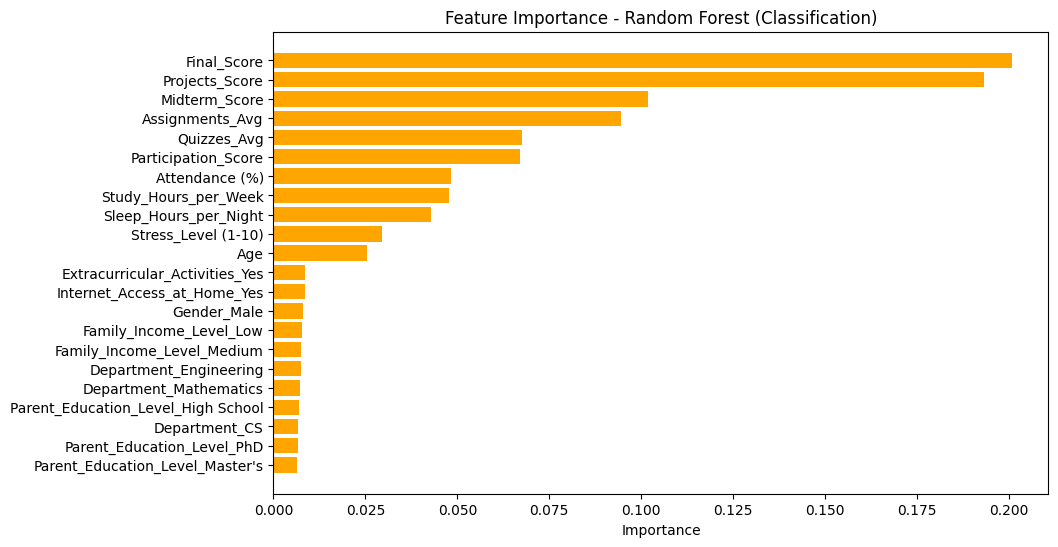

In [88]:
#(e) Feature Importance for Classification
importances_clf = best_model.feature_importances_
feat_importance_clf = pd.DataFrame({
    "Feature": X_clf.columns,
    "Importance": importances_clf
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importance_clf["Feature"], feat_importance_clf["Importance"], color="orange")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest (Classification)")
plt.show()

#Classification – Predicting Student Grade

In [89]:
#(a) Prepare Data for Classification
#loading dataset
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/Students Performance Dataset.csv')

# Step 8a: Features (X) and Target (y) for classification
X_class = df[['Attendance (%)', 'Midterm_Score', 'Final_Score',
              'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
              'Projects_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night']]

y_class = df['Grade']  # target is categorical (A, B, C, etc.)

# Encode grades into numeric labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_class = le.fit_transform(y_class)

# Split into train/test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class,
                                                            test_size=0.2, random_state=42, stratify=y_class)

In [90]:
#(b) Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_c, y_train_c)

# Predictions
y_pred_c = clf.predict(X_test_c)


Accuracy: 0.862

Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.90      0.74      0.81       128
           C       0.85      0.94      0.89       461
           D       0.87      0.87      0.87       352
           F       0.94      0.52      0.67        56

    accuracy                           0.86      1000
   macro avg       0.71      0.61      0.65      1000
weighted avg       0.86      0.86      0.86      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


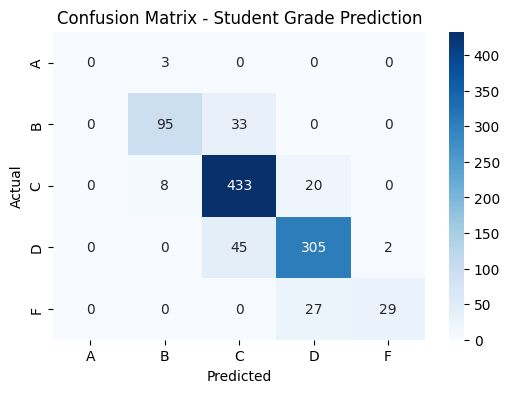

In [91]:
#(c) Evaluate Classification Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Student Grade Prediction")
plt.show()


#Try Logistic Regression (Classification)

In [92]:
#(a) Train Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression (with multinomial setting for multi-class classification)
log_reg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', random_state=42)

log_reg.fit(X_train_c, y_train_c)

# Predictions
y_pred_log = log_reg.predict(X_test_c)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.707

Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.64      0.27      0.38       128
           C       0.69      0.89      0.78       461
           D       0.76      0.72      0.74       352
           F       0.41      0.12      0.19        56

    accuracy                           0.71      1000
   macro avg       0.50      0.40      0.42      1000
weighted avg       0.69      0.71      0.68      1000



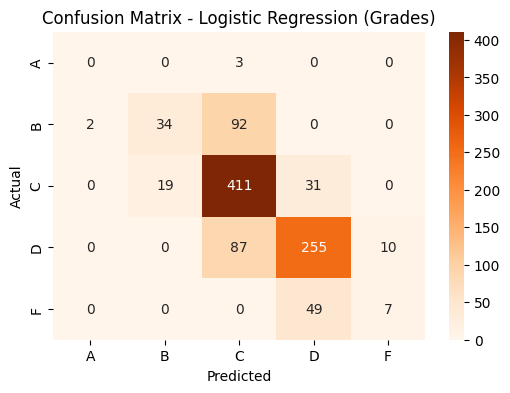

In [93]:
#(b) Evaluate Logistic Regression
# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_log))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_log, target_names=le.classes_))

# Confusion Matrix
cm_log = confusion_matrix(y_test_c, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Grades)")
plt.show()


##Decision Tree Classifier (Classification)

In [94]:
#(a) Train the Model
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # limit depth to avoid overfitting
dt_clf.fit(X_train_c, y_train_c)

# Predictions
y_pred_dt = dt_clf.predict(X_test_c)

Decision Tree Accuracy: 0.715

Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.70      0.67      0.69       128
           C       0.74      0.75      0.74       461
           D       0.69      0.74      0.72       352
           F       0.70      0.41      0.52        56

    accuracy                           0.71      1000
   macro avg       0.57      0.51      0.53      1000
weighted avg       0.71      0.71      0.71      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


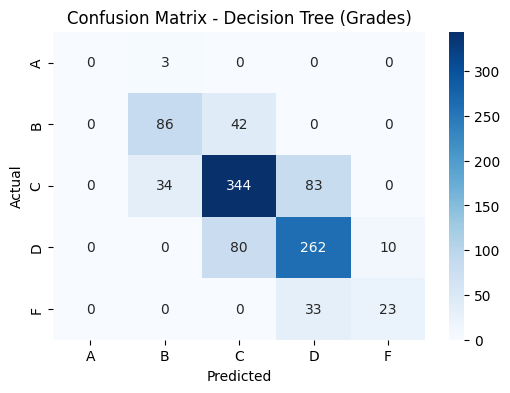

In [95]:
#(b) Evaluate the Model
# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test_c, y_pred_dt))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_dt, target_names=le.classes_))

# Confusion Matrix
cm_dt = confusion_matrix(y_test_c, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Grades)")
plt.show()

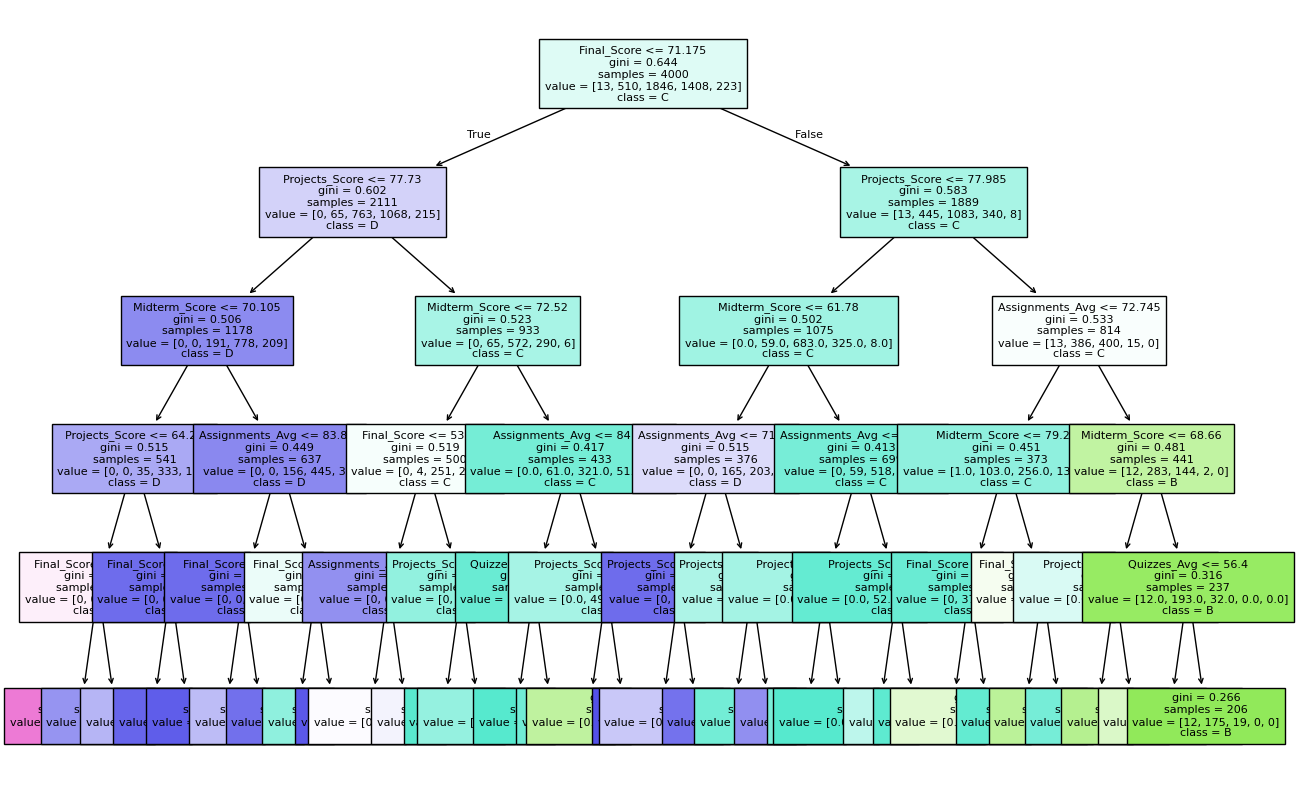

In [96]:
#(c)  Visualize the Tree
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, feature_names=X_train_c.columns, class_names=le.classes_, filled=True, fontsize=8)
plt.show()

##XGBoost Models

In [98]:
#(a) XGBoost Regression – Predicting Total_Score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_xgb = xgb_reg.predict(X_test_reg)

# Metrics
mse = mean_squared_error(y_test_reg, y_pred_xgb)
r2 = r2_score(y_test_reg, y_pred_xgb)

print("XGBoost Regression Results")
print("MSE:", mse)
print("RMSE:", mse**0.5)
print("R² Score:", r2)

XGBoost Regression Results
MSE: 0.6338547483898221
RMSE: 0.79614995345715
R² Score: 0.9881518944778147


In [100]:
#(b) XGBoost Classification – Predicting Grade
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_clf.fit(X_train_c, y_train_c)

# Predictions
y_pred_xgb_clf = xgb_clf.predict(X_test_c)

# Metrics
print("XGBoost Classification Results")
print("Accuracy:", accuracy_score(y_test_c, y_pred_xgb_clf))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_xgb_clf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_xgb_clf))

XGBoost Classification Results
Accuracy: 0.897

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.84      0.87       128
           2       0.89      0.95      0.92       461
           3       0.90      0.90      0.90       352
           4       0.93      0.66      0.77        56

    accuracy                           0.90      1000
   macro avg       0.72      0.67      0.69      1000
weighted avg       0.90      0.90      0.89      1000


Confusion Matrix:
 [[  0   3   0   0   0]
 [  0 108  20   0   0]
 [  0   8 436  17   0]
 [  0   0  33 316   3]
 [  0   0   0  19  37]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


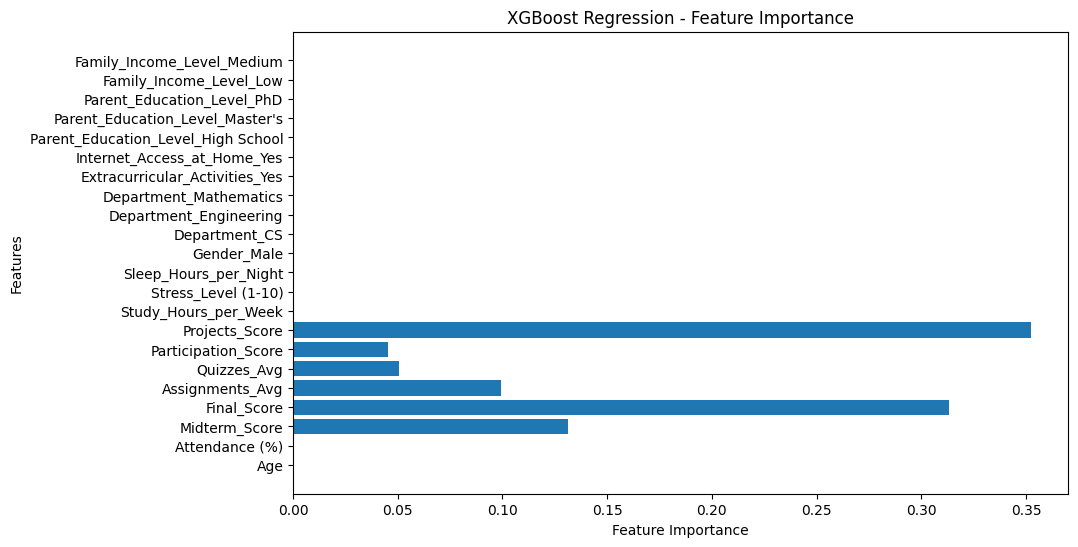

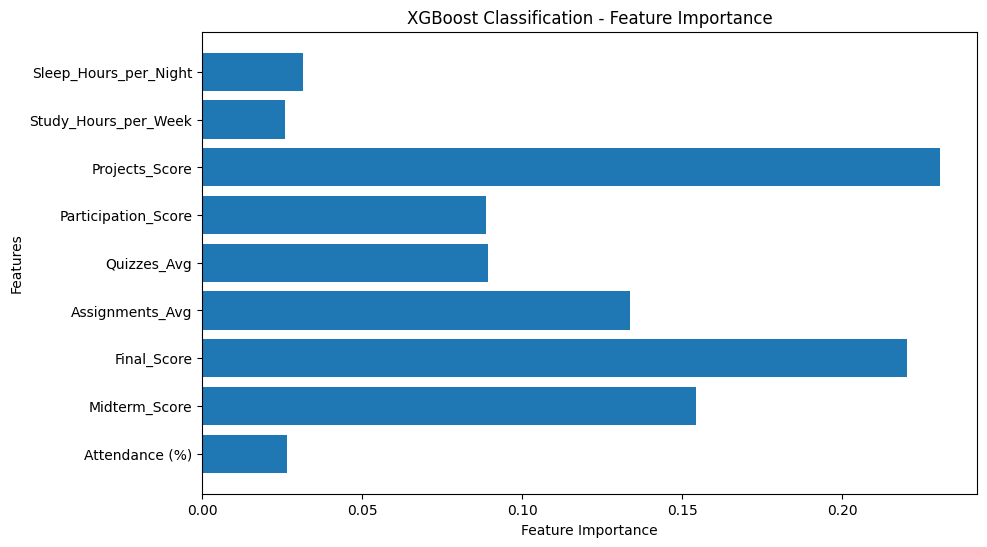

In [102]:
#(c) Feature Importance (works for both models)
import matplotlib.pyplot as plt

# Regression feature importance
plt.figure(figsize=(10,6))
plt.barh(X_reg.columns, xgb_reg.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Regression - Feature Importance")
plt.show()

# Classification feature importance
plt.figure(figsize=(10,6))
plt.barh(X_class.columns, xgb_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Classification - Feature Importance")
plt.show()

#🎯 Final Project Summary – Student Performance Prediction
##Aim of the Project

The primary aim of this project is to predict student performance (exam scores and grades) using various data science and machine learning techniques. By analyzing academic, personal, and socio-economic factors, we seek to understand what influences student outcomes and build models that can forecast their success.

##What We Did (Project Workflow)

###Data Understanding & Cleaning

Loaded and explored the dataset (student demographics, study habits, exam scores, lifestyle factors, etc.).

Checked for missing values, duplicates, and inconsistent data.


###Exploratory Data Analysis (EDA)

Visualized distributions of key features like Total Score, Study Hours, Stress Levels, Attendance.

Identified relationships and correlations among academic, lifestyle, and socio-economic variables.

###Feature Engineering

Selected important features such as Attendance, Study Hours, Participation, Parent Education Level, Stress Levels, Sleep Hours, etc.

Encoded categorical features (Gender, Extracurricular Activities, Internet Access, Family Income Level).

###Regression Models (Predicting Final Scores)

Implemented Linear Regression, Random Forest Regressor, XGBoost Regressor.

Evaluated with MSE and R² score.

Found that Random Forest and XGBoost performed better than simple linear regression.

###Classification Models (Predicting Grades)

Implemented Logistic Regression, Random Forest Classifier, XGBoost Classifier.

Evaluated with Accuracy, Confusion Matrix, and Classification Report.

Random Forest and XGBoost again gave the best classification accuracy.

###Model Insights

Attendance, Study Hours, Assignments, and Projects are the strongest predictors of student success.

Stress level and sleep hours also significantly affect performance.

##What We Achieved / Key Results

Built models that can predict student exam scores (regression) and predict student grades (classification).

Achieved strong accuracy with ensemble models (Random Forest, XGBoost).

Discovered meaningful insights about how academic effort and personal lifestyle impact performance.

#Conclusion

This project demonstrates a real-world application of machine learning in education. By predicting student outcomes, schools and institutions can:

Identify students at risk early and provide targeted support.

Suggest personalized learning plans based on study habits and stress levels.

Help parents and educators understand the role of lifestyle and socio-economic conditions in academic success.

Thus, the project not only showcases technical skills in data science and ML but also provides practical value for improving student learning outcomes.